In [33]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [34]:
input_file = '/content/drive/My Drive/Deep Learning with Python/maize_upreg_1000.fasta'
handler = open(input_file,'r')
list_string=[]
y_train1 = []
sequence=""
count=0
start_flag=False;
for string in handler:
    if(string[0]=='>'):
        start_flag=True;
        length=len(sequence)
        if(sequence!="" and length>100):
            temp=0
            for char in sequence:
                if((char=='A' or char=='T' or char=='C' or char=='G')==False):
                    temp=1;
                    break
            if(temp==0):
                list_string.append(sequence)
                y_train1.append(0)
        sequence=""
        count+=1
        continue
    if(start_flag==True):
        sequence+=string[0:len(string)-1]
    
        
#input_file = '/content/drive/My Drive/Study/T2/Bio/Project/Deep Learning with Python/maize_downreg_1000.fasta'
input_file = '/content/drive/My Drive/Deep Learning with Python/maize_downreg_1000.fasta'
handler = open(input_file,'r')
line=0;
sequence=""
count=0
start_flag=False;
for string in handler:
    if(string[0]=='>'):
        start_flag=True;
        length=len(sequence)
        if(sequence!="" and length>100):
            #print(length)
            temp=0
            for char in sequence:
                if((char=='A' or char=='T' or char=='C' or char=='G')==False):
                    temp=1;
                    break
            if(temp==0):
                list_string.append(sequence)
                y_train1.append(0)
        sequence=""
        count+=1
        continue
    if(start_flag==True):
        sequence+=string[0:len(string)-1]

    
        
stresslen= len(list_string)
#input_file = '/content/drive/My Drive/Study/T2/Bio/Project/Deep Learning with Python/maize_true_const_1000.fasta'
input_file = '/content/drive/My Drive/Deep Learning with Python/maize_true_const_1000.fasta'
handler = open(input_file,'r')

line=0;
sequence=""
count=0
start_flag=False;
for string in handler:
    if(string[0]=='>'):
        start_flag=True;
        length=len(sequence)
        if(sequence!="" and length>100):
            #print(length)
            temp=0
            for char in sequence:
                if((char=='A' or char=='T' or char=='C' or char=='G')==False):
                    temp=1;
                    break
            if(temp==0):
                list_string.append(sequence)
                y_train1.append(1)
        sequence=""
        count+=1
        continue
    if(start_flag==True):
        sequence+=string[0:len(string)-1]
#     if(len(list_string)==2*stresslen):
#         break;
constlen = len(list_string)        
print(constlen-stresslen)
print(stresslen)

31532
9481


In [0]:
maxlen = 1000
import numpy as np
x_train1 = np.zeros((len(list_string),maxlen))
i=0
for string in list_string:
  j=0
  for char in string:
    if(char=='A'):
      x_train1[i][j]=1
    if(char=='T'):
      x_train1[i][j]=2
    if(char=='C'):
      x_train1[i][j]=3
    if(char=='G'):
      x_train1[i][j]=4
    j=j+1
  i=i+1
print(len(list_string[0]))
print(x_train1.shape)

1000
(41013, 1000)


In [0]:
y_train1 = np.array(y_train1)

indices = np.arange(x_train1.shape[0])
np.random.shuffle(indices)
x_train1 = x_train1[indices]
y_train1 = y_train1[indices]
print(x_train1.shape)
print(y_train1.shape)

(41013, 1000)
(41013,)


In [0]:

x_train = np.zeros((2*stresslen,maxlen))
y_train = np.random.rand(2*stresslen)
j = 0
k = 0
l = 0
for i in range(0,len(list_string)):
  if(y_train1[i]==0 and j<stresslen):
    x_train[l]= x_train1[i]
    y_train[l]= 0
    j+=1
    l+=1
  elif(y_train1[i]==1 and k<stresslen):
    x_train[l]= x_train1[i]
    y_train[l]= 1
    k+=1
    l+=1

print(i,j,k,l)

41012 9481 9481 18962


In [0]:
indices = np.arange(x_train.shape[0])
np.random.shuffle(indices)
x_train = x_train[indices]
y_train = y_train[indices]
print(x_train.shape)
print(y_train.shape)

(18962, 1000)
(18962,)


In [0]:
import numpy as np
from keras import Input
from keras.models import Sequential,Model
from keras.layers import Embedding, Flatten, Dense,LSTM,MaxPooling1D,Conv1D,Dropout,merge,Permute,Lambda,Reshape,RepeatVector,Multiply,Activation
from keras import layers
from keras import backend as K
max_words = 5
embedding_dim = 4

units = 64

embedding_matrix=np.array([[0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0]])
_input = Input(shape=[maxlen], dtype='int32')
embedded = Embedding(max_words,embedding_dim,input_length=maxlen,weights=[embedding_matrix],trainable=False)(_input)
conv1 = layers.Conv1D(16, 7, activation='relu')(embedded)
maxpool1 = layers.MaxPooling1D(2)(conv1)
conv2 = layers.Conv1D(32, 7, activation='relu')(maxpool1)
maxpool2 = layers.MaxPooling1D(2)(conv2)
conv3 = layers.Conv1D(64, 7, activation='relu')(maxpool2)
maxpool3 = layers.MaxPooling1D(2)(conv3)
lstm = LSTM(units,return_sequences=True)(maxpool3)

attention = Dense(1, activation='tanh')(lstm)
attention = Flatten()(attention)
attention = Activation('softmax')(attention)
attention = RepeatVector(units)(attention)
attention = Permute([2, 1])(attention)

sent_representation = Multiply()([lstm, attention])
sent_representation = Lambda(lambda xin: K.sum(xin, axis=-2), output_shape=(units,))(sent_representation)
# flat = Flatten()(lstm)
# dense0 = Dense(256, activation='relu')(flat)
# drop0 = Dropout(0.3)(dense0)
# dense = Dense(128, activation='relu')(drop0)
# drop = Dropout(0.3)(dense)
# dense1 = Dense(64, activation='relu')(drop)
# drop1 = Dropout(0.3)(dense1)
# dense2 = Dense(32, activation='relu')(drop1)
# drop2 = Dropout(0.3)(dense2)
output1 = Dense(1, activation='sigmoid')(sent_representation)
model = Model(input=_input, output=output1)
model.summary()

Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           (None, 1000)         0                                            
__________________________________________________________________________________________________
embedding_12 (Embedding)        (None, 1000, 4)      20          input_12[0][0]                   
__________________________________________________________________________________________________
conv1d_11 (Conv1D)              (None, 994, 16)      464         embedding_12[0][0]               
__________________________________________________________________________________________________
max_pooling1d_11 (MaxPooling1D) (None, 497, 16)      0           conv1d_11[0][0]                  
___________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


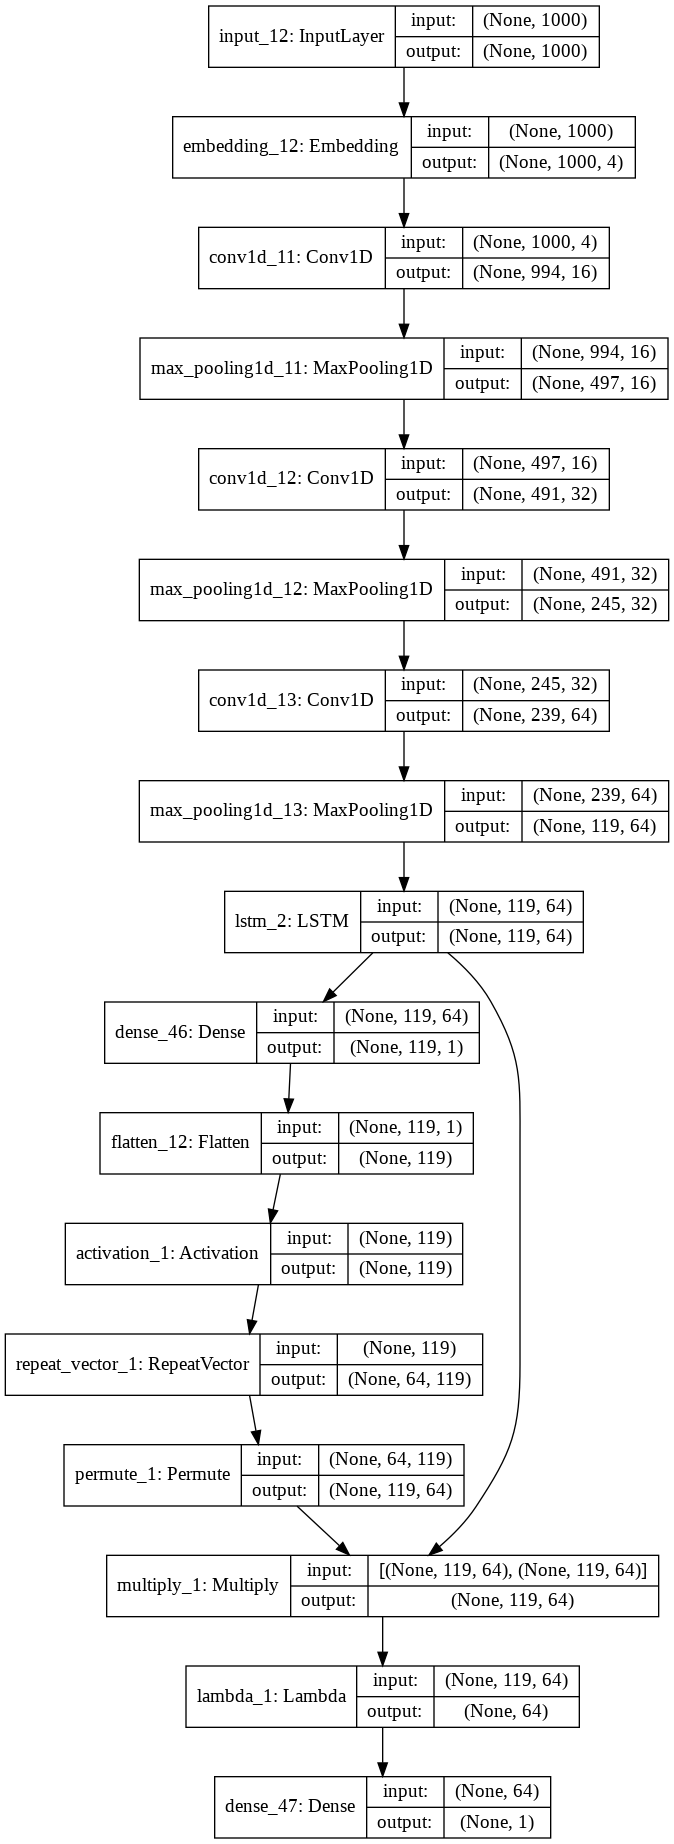

In [0]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='/content/drive/My Drive/Deep Learning with Python/pic10.png', show_shapes=True, show_layer_names=True)

In [0]:
model.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=200,
                    batch_size=256,validation_split =.1)
        

Train on 17065 samples, validate on 1897 samples
Epoch 1/200
17065/17065 [==============================] - 1s 58us/step - loss: 0.6863 - acc: 0.5446 - val_loss: 0.6589 - val_acc: 0.5930
Epoch 2/200
17065/17065 [==============================] - 1s 43us/step - loss: 0.6230 - acc: 0.6403 - val_loss: 0.6064 - val_acc: 0.6547
Epoch 3/200
17065/17065 [==============================] - 1s 43us/step - loss: 0.5539 - acc: 0.7058 - val_loss: 0.5710 - val_acc: 0.6874
Epoch 4/200
17065/17065 [==============================] - 1s 43us/step - loss: 0.4875 - acc: 0.7685 - val_loss: 0.5431 - val_acc: 0.7343
Epoch 5/200
17065/17065 [==============================] - 1s 42us/step - loss: 0.4356 - acc: 0.8061 - val_loss: 0.5250 - val_acc: 0.7385
Epoch 6/200
17065/17065 [==============================] - 1s 43us/step - loss: 0.3987 - acc: 0.8294 - val_loss: 0.5113 - val_acc: 0.7522
Epoch 7/200
17065/17065 [==============================] - 1s 44us/step - loss: 0.3675 - acc: 0.8504 - val_loss: 0.5225 - v

KeyboardInterrupt: ignored